# Working with APIs

API stands for Application programming interface<br>
APIs are a way for applications to talk to eachother<br>
In python we use the requests package to handle the connection<br>
<small><strong>Note: It is requests with an s not request(this is a different package)</strong></small><br>
Most API's communicate with data in the form of JSON<br>
JSON stands for JavaScript Object Notation

In [2]:
#import the packages we need:


import requests as r

We will be connecting to the Ergast F1 Racer API today:
http://ergast.com/mrd/

to view JSON data nicely in the Chrome browser install the extension JSONview

In [6]:

# we can also add information with post or put
# 200 line is a success line
# 300 line is a ridirection line
# 400 line is error request
# 500 line is server problem

res = r.get('https://ergast.com/api/f1/2022/5/driverStandings.json')
print(res)
print(type(res))


    

<Response [200]>
<class 'requests.models.Response'>


In [7]:
res.status_code

200

In [8]:
#response object
res.ok

True

In [11]:
#check and make sure we got a successful response from the API
if res.ok:
    data = res.json()
    print(data)
    print(type(data))

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5', 'series': 'f1', 'url': 'http://ergast.com/api/f1/2022/5/driverstandings.json', 'limit': '30', 'offset': '0', 'total': '21', 'StandingsTable': {'season': '2022', 'round': '5', 'StandingsLists': [{'season': '2022', 'round': '5', 'DriverStandings': [{'position': '1', 'positionText': '1', 'points': '104', 'wins': '2', 'Driver': {'driverId': 'leclerc', 'permanentNumber': '16', 'code': 'LEC', 'url': 'http://en.wikipedia.org/wiki/Charles_Leclerc', 'givenName': 'Charles', 'familyName': 'Leclerc', 'dateOfBirth': '1997-10-16', 'nationality': 'Monegasque'}, 'Constructors': [{'constructorId': 'ferrari', 'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari', 'name': 'Ferrari', 'nationality': 'Italian'}]}, {'position': '2', 'positionText': '2', 'points': '85', 'wins': '3', 'Driver': {'driverId': 'max_verstappen', 'permanentNumber': '33', 'code': 'VER', 'url': 'http://en.wikipedia.org/wiki/Max_Verstappen', 'givenName': 'Max', 'familyName': 'Verstappe

In [14]:
#view the response as a JSON
standings = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
for entry in standings:
    string = f"{entry['Driver']['givenName']} {entry['Driver']['familyName']} drive for {entry['Constructors'][0]['name']}"
    print(string)

Charles Leclerc drive for Ferrari
Max Verstappen drive for Red Bull
Sergio Pérez drive for Red Bull
George Russell drive for Mercedes
Carlos Sainz drive for Ferrari
Lewis Hamilton drive for Mercedes
Lando Norris drive for McLaren
Valtteri Bottas drive for Alfa Romeo
Esteban Ocon drive for Alpine F1 Team
Kevin Magnussen drive for Haas F1 Team
Daniel Ricciardo drive for McLaren
Yuki Tsunoda drive for AlphaTauri
Pierre Gasly drive for AlphaTauri
Sebastian Vettel drive for Aston Martin
Alexander Albon drive for Williams
Fernando Alonso drive for Alpine F1 Team
Lance Stroll drive for Aston Martin
Guanyu Zhou drive for Alfa Romeo
Mick Schumacher drive for Haas F1 Team
Nico Hülkenberg drive for Aston Martin
Nicholas Latifi drive for Williams


In [24]:
my_year = input('What year do you want to look up?')
my_round = input('What round do you want to look up?')
res = r.get(f'https://ergast.com/api/f1/{my_year}/{my_round}/driverStandings.json')
if res.ok:
    print(f'This is ths info for the {my_year} year round {my_round}!')
    data = res.json()
    standings = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
    for entry in standings:
        string = f"{entry['Driver']['givenName']} {entry['Driver']['familyName']} drive for {entry['Constructors'][0]['name']}"
        print(string)
else: 
    print('Invalid year/round combination')

What year do you want to look up? 1999
What round do you want to look up? 1


This is ths info for the 1999 year round 1!
Eddie Irvine drive for Ferrari
Heinz-Harald Frentzen drive for Jordan
Ralf Schumacher drive for Williams
Giancarlo Fisichella drive for Benetton
Rubens Barrichello drive for Stewart
Pedro de la Rosa drive for Arrows
Toranosuke Takagi drive for Arrows
Michael Schumacher drive for Ferrari


In [43]:
import requests as r 
res = r.get('https://ergast.com/api/f1/2022/5/driverStandings.json')
print(res)
res.status_code
if res.ok:
    data = res.json()
    stading = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
    for entry in standings:
        string = f"{entry['Driver']['givenName']}"
        
        print(string)
else: 
    print('Invalid year/round combination')



<Response [200]>
Eddie
Heinz-Harald
Ralf
Giancarlo
Rubens
Pedro
Toranosuke
Michael


In [27]:
# We only want the Driver Standings
def getRacerInfo(my_year, my_round):
    res = r.get(f'https://ergast.com/api/f1/{my_year}/{my_round}/driverStandings.json')
    if res.ok:
        data = res.json()
        standings = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
        output = {}
        for entry in standings:
            full_name = f"{entry['Driver']['givenName']} {entry['Driver']['familyName']}"
            output[full_name] = {
                'position': entry['position'],
                'team': entry['Constructors'][0]['name']
            }
        return output
             
            
    else:
        return 'Invalid year/round combination'
    
getRacerInfo(2020, 1)

{'Valtteri Bottas': {'position': '1', 'team': 'Mercedes'},
 'Charles Leclerc': {'position': '2', 'team': 'Ferrari'},
 'Lando Norris': {'position': '3', 'team': 'McLaren'},
 'Lewis Hamilton': {'position': '4', 'team': 'Mercedes'},
 'Carlos Sainz': {'position': '5', 'team': 'McLaren'},
 'Sergio Pérez': {'position': '6', 'team': 'Racing Point'},
 'Pierre Gasly': {'position': '7', 'team': 'AlphaTauri'},
 'Esteban Ocon': {'position': '8', 'team': 'Renault'},
 'Antonio Giovinazzi': {'position': '9', 'team': 'Alfa Romeo'},
 'Sebastian Vettel': {'position': '10', 'team': 'Ferrari'},
 'Nicholas Latifi': {'position': '11', 'team': 'Williams'},
 'Daniil Kvyat': {'position': '12', 'team': 'AlphaTauri'},
 'Alexander Albon': {'position': '13', 'team': 'Red Bull'},
 'Kimi Räikkönen': {'position': '14', 'team': 'Alfa Romeo'},
 'George Russell': {'position': '15', 'team': 'Williams'},
 'Romain Grosjean': {'position': '16', 'team': 'Haas F1 Team'},
 'Kevin Magnussen': {'position': '17', 'team': 'Haas F1

# <strong>Homework</strong>
check out this Pokemon API https://pokeapi.co/
Use the requests package to connect to this API and get and store data for 5 different pokemon.
Get the pokemons: name, atleast one ability's name, base_experience, and the URL for its sprite (an image that shows up on screen) for the 'front_shiny', attack base_state, hp base_stat, defense base_stat

Enter your lucky number to see your lucky pokemon at the end of list: 44


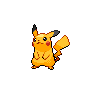

Name:			pikachu
Ability:		static
Base experience:	 112
Attack:			 55
Defense:		 40
Hp			+35




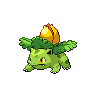

Name:			ivysaur
Ability:		overgrow
Base experience:	 142
Attack:			 62
Defense:		 63
Hp			+60




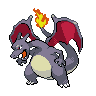

Name:			charizard
Ability:		blaze
Base experience:	 267
Attack:			 84
Defense:		 78
Hp			+78




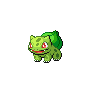

Name:			bulbasaur
Ability:		overgrow
Base experience:	 64
Attack:			 49
Defense:		 49
Hp			+45




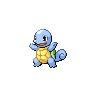

Name:			squirtle
Ability:		torrent
Base experience:	 63
Attack:			 48
Defense:		 65
Hp			+44




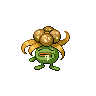

Name:			gloom
Ability:		chlorophyll
Base experience:	 138
Attack:			 65
Defense:		 70
Hp			+60


Your lucky pokemon is !!
dict[0]


In [81]:
import requests as r
from PIL import Image 
from io import BytesIO


def my_favourite_pokemon(pokemon):
    
    res = r.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    
    if res.ok:
        data = res.json()
        try:
            name = data['name']
            ability = data["abilities"][0]["ability"]["name"]
            base_experience = data['base_experience']
            sprite_url = data["sprites"]["front_shiny"]
            response = r.get(sprite_url)
            img = Image.open(BytesIO(response.content))
            magnify_factor = 2
            display(img)

            # width, height = img.size
            # new_size = (width * magnify_factor, height * magnify_factor)
            # magnified_img = img.resize(new_size)
            # magnified_img.show()


            stats = data['stats']
            for stat in stats:
                if stat['stat']['name'] == 'attack':
                    attack = stat['base_stat']
                elif stat["stat"]["name"] == "defense":
                    defense = stat["base_stat"]
                elif stat["stat"]["name"] == "hp":
                    hp = stat["base_stat"]
            dict = {'Name':name, 'Ability':ability, 'Base experience':base_experience, 'Attack':attack, 'Defense':defense, 'Hp':hp}

            print(f"Name:\t\t\t{name}")
            print(f"Ability:\t\t{ability}")
            print(f"Base experience:\t {base_experience}")
            print(f"Attack:\t\t\t {attack}")
            print(f"Defense:\t\t {defense}")
            print(f"Hp\t\t\t+{hp}")
            print()
            print()
        except (KeyError, IndexError):
            print(f"Pokemon with name '{pokemon}' not found.\n")
            
            one = one.append(dict)

            


pokemons = ['pikachu','ivysaur','charizard','bulbasaur','squirtle']

interaction = input('Enter your lucky number to see your lucky pokemon at the end of list:')

if interaction.isdigit():
    if int(interaction) < 1000:
        pokemons.append(interaction)
        
    else:
        print("Out of bounce! Please enter digit below 1000!!")
else: 
    print('Better luck next time :). Checkout my pokemons!!')
for pokemon in pokemons:
    my_favourite_pokemon(pokemon)
print(f"Here is your lucky pokemon!!")

#### 